<a href="https://colab.research.google.com/github/women-in-ai-ireland/October-2020-WaiLEARN-004/blob/master/WAI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ONLINE RETAIL DATA PROJECT**

##**Data Set Information:**
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

###**Exploratory Data Analysis** 

##### 1. Importing needed libraries and reading the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
from collections import OrderedDict
import datetime as dt
#import pycountry

In [ ]:
data =pd.read_excel('/content/Online Retail.xlsx')

##### 2. Insights from the dataset



*   The dataset has 541,909 rows and 8 columns

*   The variables *CustomerId* and *Description* are the ones with the highest number of missing values.
*   The average product price is 4.61 pounds
*   The following variables need to be converted in the next steps:  ***CustomerId*** to object.



In [ ]:
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

3. Data Manipulation

* In this step we are going to convert the variable CustomerID  into character as mentioned above and also removing the rows where there are missing values.

In [ ]:
data['CustomerID'] = data['CustomerID'] .astype(str)

In [ ]:
data = data.dropna()

In [ ]:
data['Country'] = data['Country'].replace(['EIRE'],'Ireland')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  object        
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.1+ MB


*  Top 10 Countries with most sold products



In [ ]:
df_country = data.groupby('Country', as_index= False).agg({'InvoiceNo': pd.Series.count, 'Quantity': pd.Series.sum,
                                                   'UnitPrice': pd.Series.mean}).sort_values(by= 'InvoiceNo', ascending=False) 
df.head(10)

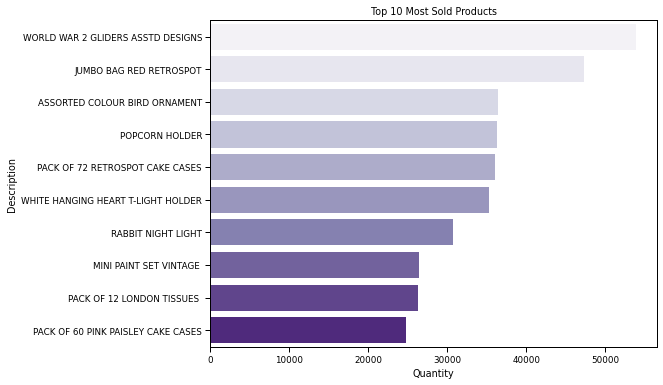

In [ ]:
df = data.groupby('Description', as_index= False).agg({'Quantity': pd.Series.sum}).sort_values(by= 'Quantity', ascending=False) 
#Plotting the top 10 products
plt.figure(figsize=(8,6))
sns.barplot(x= 'Quantity', y= 'Description', data = df.head(10), palette = 'Purples')
plt.title('Top 10 Most Sold Products')
plt.show()

*  Top 10 Countries with the highest volume of invoices

In [ ]:
df_country = data.groupby('Country', as_index= False).agg({'InvoiceNo': pd.Series.count, 'Quantity': pd.Series.sum,
                                                   'UnitPrice': pd.Series.mean}).sort_values(by= 'InvoiceNo', ascending=False) 


In [ ]:
pip install pycountry
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df_country['CODE']=alpha3code(df_country.Country)
df_country.head()

,Country,InvoiceNo,Quantity,UnitPrice,CODE
36,United Kingdom,494024,4277438,4.545762,GBR
13,Germany,9495,117448,3.966930,DEU
12,France,8557,110480,5.028864,FRA
17,Ireland,8196,142637,5.911077,IRL
31,Spain,2533,26824,4.987544,ESP


In [ ]:
import plotly.express as px
fig = px.scatter_geo(df_country.head(10), locations="CODE", color="Country",
                     hover_name="Country", size="InvoiceNo",
                     projection="natural earth",
                     title = 'Top 10 Countries with the Highest Volume of Purchases')
fig.show()

## **Cohort Analysis**

In [ ]:
# Create a copy of rfm_train dataframe for cohort analysis
cohort = data.copy()

In [ ]:
# Define a function that will parse the date
def get_month(x):
    return dt.datetime(x.year,x.month,1) 

# Create InvoiceMonth column
cohort['InvoiceMonth'] = cohort['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
grouping = cohort.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceMonth value to the dataset
cohort['CohortMonth'] = grouping.transform('min')

In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [ ]:
# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

In [ ]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

In [ ]:
cohort.head(2)

In [ ]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

In [ ]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

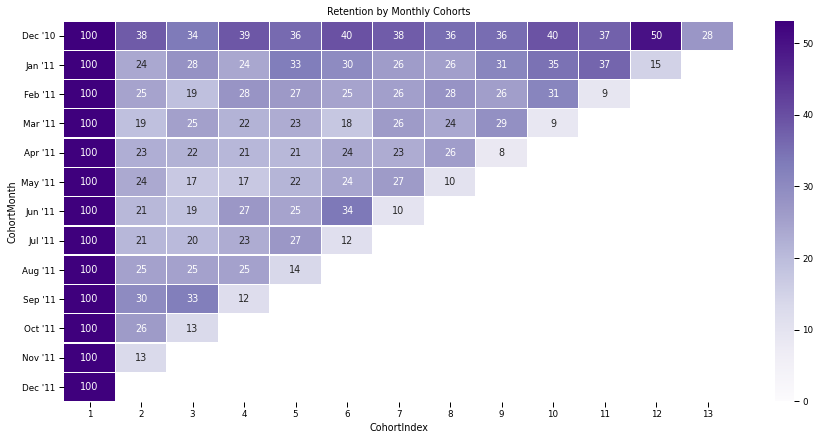

In [ ]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

# Initialize inches plot figure
plt.figure(figsize=(15,7))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention,
            annot = True,
            cmap = "Purples",
            vmin = 0.0,
#             vmax = 0.5,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.0f',
            linewidth = 0.3,
            yticklabels=month_list)


plt.show();